# Housing Price Prediction

## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import OrdinalEncoder
from geopy.geocoders import Nominatim
from sklearn.preprocessing import StandardScaler

## Loading dataset

In [2]:
df = pd.read_csv("data\Delhi_housing.csv")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


## Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7738 non-null   int64  
 1   price             7738 non-null   float64
 2   Address           7738 non-null   object 
 3   area              7738 non-null   float64
 4   latitude          7738 non-null   float64
 5   longitude         7738 non-null   float64
 6   Bedrooms          7738 non-null   float64
 7   Bathrooms         7738 non-null   float64
 8   Balcony           5166 non-null   float64
 9   Status            7164 non-null   object 
 10  neworold          7738 non-null   object 
 11  parking           2612 non-null   float64
 12  Furnished_status  4124 non-null   object 
 13  Lift              1733 non-null   float64
 14  Landmarks         2759 non-null   object 
 15  type_of_building  7738 non-null   object 
 16  desc              7738 non-null   object 


In [6]:
print(df.columns)

Index(['Unnamed: 0', 'price', 'Address', 'area', 'latitude', 'longitude',
       'Bedrooms', 'Bathrooms', 'Balcony', 'Status', 'neworold', 'parking',
       'Furnished_status', 'Lift', 'Landmarks', 'type_of_building', 'desc',
       'Price_sqft'],
      dtype='object')


## Dropping Unneccesary Feature and Adding useful Feature

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7738 non-null   float64
 1   Address           7738 non-null   object 
 2   area              7738 non-null   float64
 3   latitude          7738 non-null   float64
 4   longitude         7738 non-null   float64
 5   Bedrooms          7738 non-null   float64
 6   Bathrooms         7738 non-null   float64
 7   Balcony           5166 non-null   float64
 8   Status            7164 non-null   object 
 9   neworold          7738 non-null   object 
 10  parking           2612 non-null   float64
 11  Furnished_status  4124 non-null   object 
 12  Lift              1733 non-null   float64
 13  Landmarks         2759 non-null   object 
 14  type_of_building  7738 non-null   object 
 15  desc              7738 non-null   object 
 16  Price_sqft        7738 non-null   float64


#### Adding Kitchen on the basis of Bedrooms available in a property

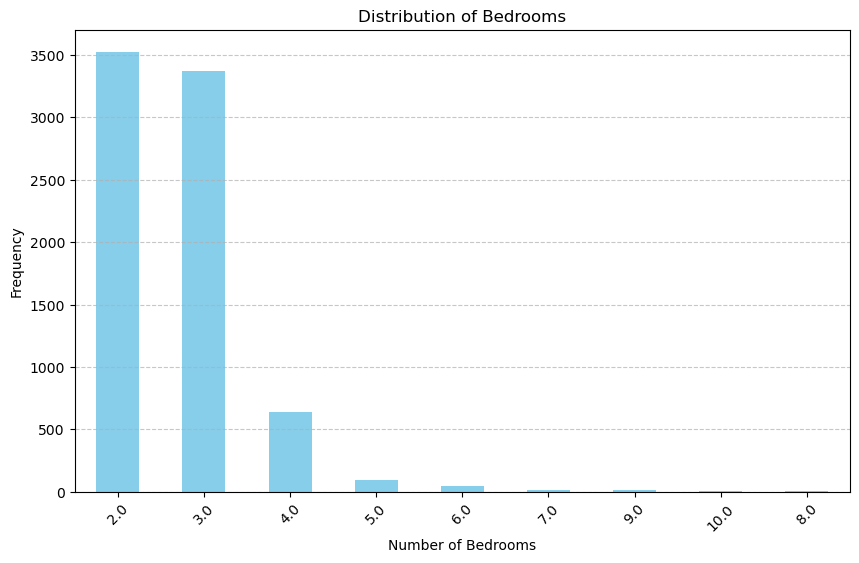

In [9]:
bedroom_counts = df['Bedrooms'].value_counts()
plt.figure(figsize=(10, 6))
bedroom_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
def generate_kitchen(row):
    num_bedrooms = row['Bedrooms']
    if 2 <= num_bedrooms <= 4:
        return np.random.randint(1, 3)
    elif 5 <= num_bedrooms <= 7:
        return np.random.randint(3, 7)
    elif 8 <= num_bedrooms <= 10:
        return np.random.randint(6, 11)

df['kitchen'] = df.apply(generate_kitchen, axis=1)

## New Dataset Information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7738 non-null   float64
 1   Address           7738 non-null   object 
 2   area              7738 non-null   float64
 3   latitude          7738 non-null   float64
 4   longitude         7738 non-null   float64
 5   Bedrooms          7738 non-null   float64
 6   Bathrooms         7738 non-null   float64
 7   Balcony           5166 non-null   float64
 8   Status            7164 non-null   object 
 9   neworold          7738 non-null   object 
 10  parking           2612 non-null   float64
 11  Furnished_status  4124 non-null   object 
 12  Lift              1733 non-null   float64
 13  Landmarks         2759 non-null   object 
 14  type_of_building  7738 non-null   object 
 15  desc              7738 non-null   object 
 16  Price_sqft        7738 non-null   float64


In [12]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Balcony             2572
Status               574
parking             5126
Furnished_status    3614
Lift                6005
Landmarks           4979
dtype: int64


In [13]:
int_features = df.select_dtypes(include=["int64"]).columns
print("Total number of integer features: ", int_features.shape[0])
print("Integer feature names: ", int_features.tolist())

Total number of integer features:  1
Integer feature names:  ['kitchen']


In [14]:
float_features = df.select_dtypes(include=["float64"]).columns
print("Total number of floating features: ", float_features.shape[0])
print("Floating feature names: ", float_features.tolist())

Total number of floating features:  10
Floating feature names:  ['price', 'area', 'latitude', 'longitude', 'Bedrooms', 'Bathrooms', 'Balcony', 'parking', 'Lift', 'Price_sqft']


In [15]:
cat_features = df.select_dtypes(include=["object"]).columns
print("Total number of catagorical features: ", cat_features.shape[0])
print("Catagorical feature names: ", cat_features.tolist())

Total number of catagorical features:  7
Catagorical feature names:  ['Address', 'Status', 'neworold', 'Furnished_status', 'Landmarks', 'type_of_building', 'desc']


## Statistical Information of Numerical Features

In [16]:
#pd.set_option('display.max_colwidth', None)
df.describe()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft,kitchen
count,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,5166.000000,2612.000000,1733.000000,7738.000000,7738.000000
mean,8.320635e+06,1409.506591,28.552092,77.273476,2.708193,2.501163,2.426442,7.673047,1.829198,5543.660241,1.602869
std,7.223197e+06,718.929581,0.107420,0.180606,0.877026,0.867050,1.083677,60.417508,1.192607,2408.659307,0.820808
min,1.700000e+06,501.000000,28.240023,76.884101,2.000000,2.000000,1.000000,1.000000,0.000000,2100.000000,1.000000
25%,4.200000e+06,990.000000,28.455539,77.078590,2.000000,2.000000,2.000000,1.000000,1.000000,3950.986915,1.000000
50%,6.000000e+06,1250.000000,28.574637,77.345320,3.000000,2.000000,2.000000,1.000000,2.000000,4972.674332,2.000000
75%,9.500000e+06,1650.000000,28.642520,77.421054,3.000000,3.000000,3.000000,2.000000,2.000000,6350.638693,2.000000
max,8.500000e+07,9500.000000,28.799748,77.688028,10.000000,10.000000,10.000000,1406.000000,10.000000,44378.698225,10.000000


In [17]:
df.describe().shape

(8, 11)

## Visualizing null Values

<Axes: >

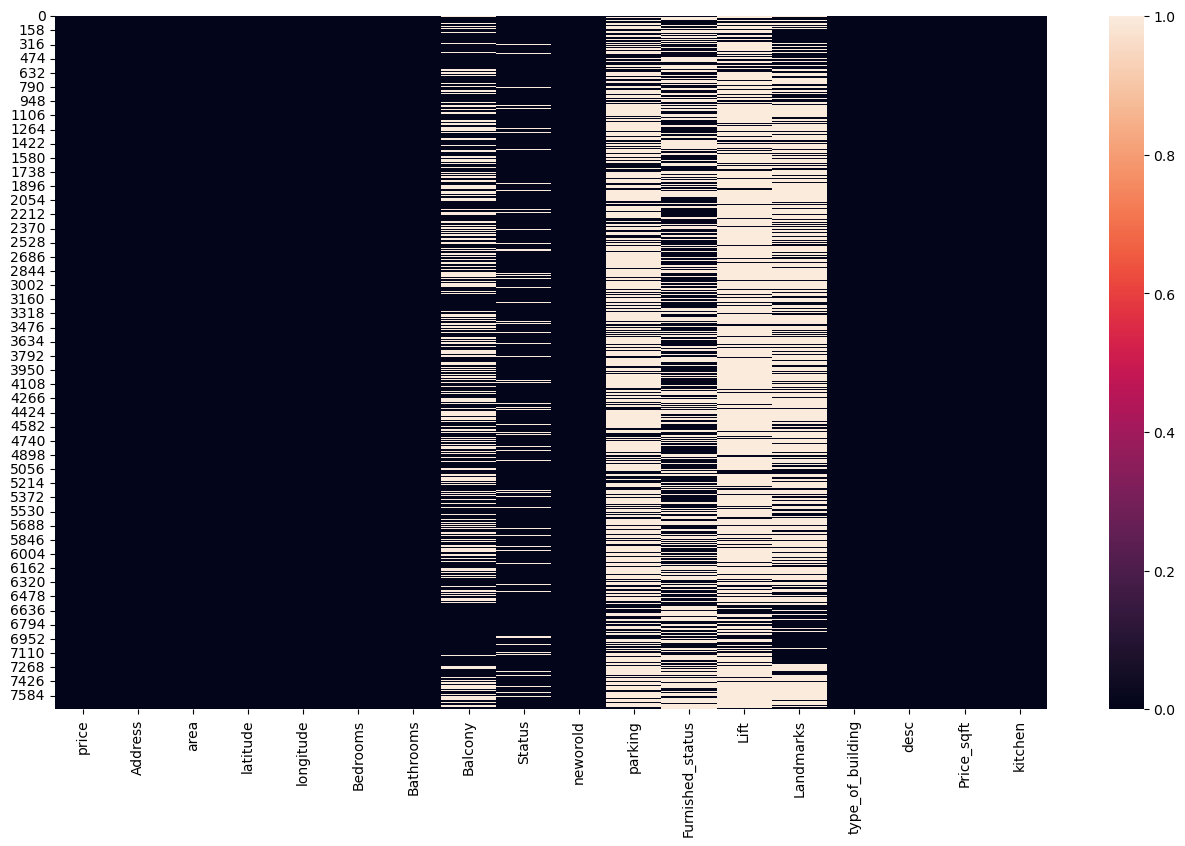

In [18]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

## Null Value Percentage for every feature

In [19]:
null_percent = df.isnull().sum()/df.shape[0] * 100
null_percent

price                0.000000
Address              0.000000
area                 0.000000
latitude             0.000000
longitude            0.000000
Bedrooms             0.000000
Bathrooms            0.000000
Balcony             33.238563
Status               7.417937
neworold             0.000000
parking             66.244508
Furnished_status    46.704575
Lift                77.604032
Landmarks           64.344792
type_of_building     0.000000
desc                 0.000000
Price_sqft           0.000000
kitchen              0.000000
dtype: float64

In [20]:
missing_value_feat = null_percent[null_percent > 0]
missing_value_feat

Balcony             33.238563
Status               7.417937
parking             66.244508
Furnished_status    46.704575
Lift                77.604032
Landmarks           64.344792
dtype: float64

## Missing Value Imputation

In [21]:
cat_na_feat = missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("Total number of categorical missing features = ", len(cat_na_feat))
cat_na_feat

Total number of categorical missing features =  3


Status               7.417937
Furnished_status    46.704575
Landmarks           64.344792
dtype: float64

In [22]:
int_na_feat = missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("Total number of integer missing features = ", len(int_na_feat))
int_na_feat

Total number of integer missing features =  0


Series([], dtype: float64)

In [23]:
float_na_feat = missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("Total number of float missing features = ", len(float_na_feat))
float_na_feat

Total number of float missing features =  3


Balcony    33.238563
parking    66.244508
Lift       77.604032
dtype: float64

### Catagorical Features

#### handling 'status' = 7.417937

In [24]:
df["Status"].value_counts()

Status
Ready to Move         7148
Under Construction      16
Name: count, dtype: int64

<Axes: >

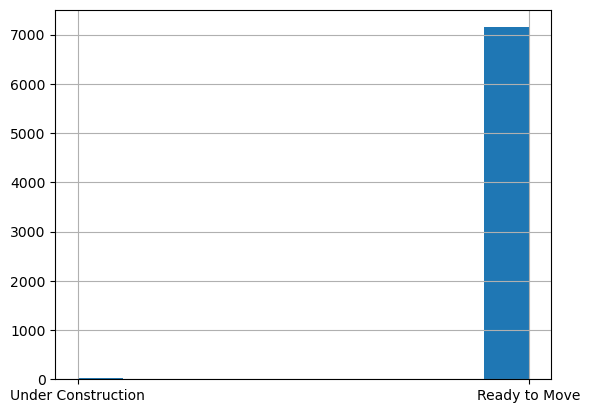

In [25]:
df["Status"].hist()

In [26]:
# Backup of DataFrame for imputation

In [27]:
df_mvi = df.copy()
df_mvi.shape

(7738, 18)

In [28]:
status_mode = df["Status"].mode()[0]
status_mode

'Ready to Move'

In [29]:
df_mvi["Status"].replace(np.nan, status_mode, inplace=True)
df_mvi["Status"].isnull().sum()

0

<Axes: >

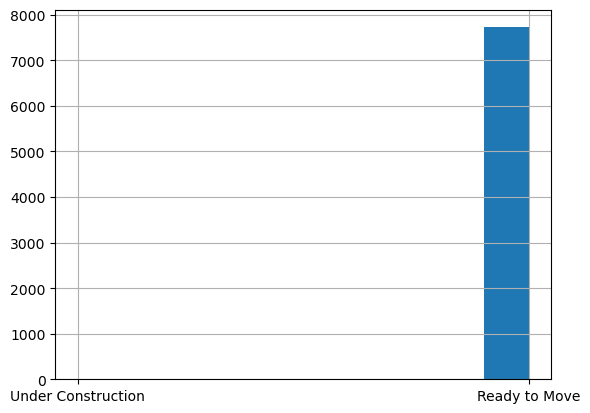

In [30]:
df_mvi["Status"].hist()

In [31]:
df_mvi["Status"].value_counts()

Status
Ready to Move         7722
Under Construction      16
Name: count, dtype: int64

#### Handling Furnished_status = 46.704575

In [32]:
df_mvi["Furnished_status"].value_counts()

Furnished_status
Semi-Furnished    2199
Unfurnished       1230
Furnished          695
Name: count, dtype: int64

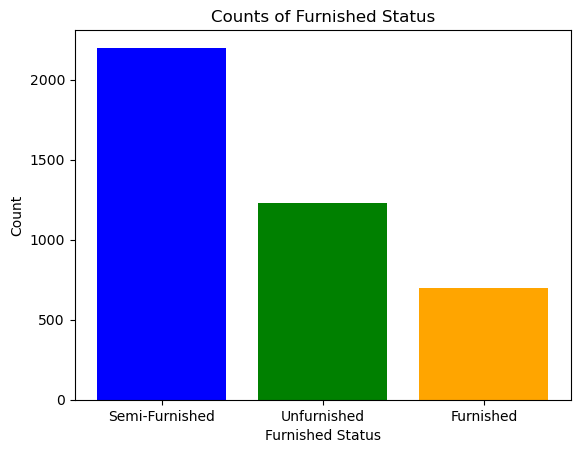

In [33]:
furnished_status = ['Semi-Furnished', 'Unfurnished', 'Furnished']
counts = [2199, 1230, 695]

plt.bar(furnished_status, counts, color=['blue', 'green', 'orange'])
plt.xlabel('Furnished Status')
plt.ylabel('Count')
plt.title('Counts of Furnished Status')
plt.show()

In [34]:
mode_furnished_status = df_mvi['Furnished_status'].mode()[0]

df_mvi['Furnished_status'].fillna(mode_furnished_status, inplace=True)

<Axes: >

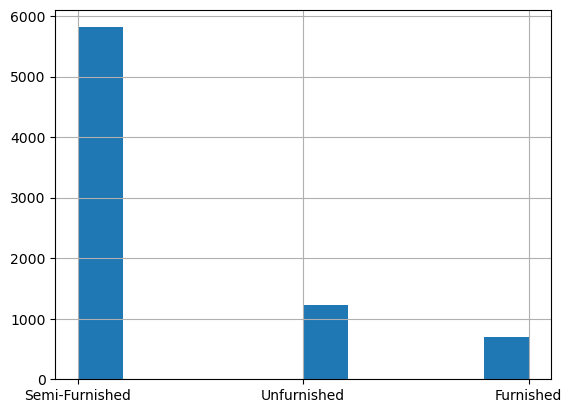

In [35]:
df_mvi['Furnished_status'].hist()

In [36]:
df_mvi['Furnished_status'].isnull().sum()

0

#### Handling Landmarks = 64.344792

In [37]:
df_mvi["Landmarks"].value_counts()

Landmarks
metro station                                    8
NH 8 and Dwarka Expressway                       6
Shipra Mall                                      6
DPS School                                       6
abes engineering college                         5
                                                ..
Next to sector 78 metro station                  1
Main Market is just 100 mtr walking distance.    1
telephone exchange sector 12, gurgaon            1
Nearby Sanjay Park                               1
vvip mall                                        1
Name: count, Length: 2612, dtype: int64

In [38]:
landmark_const = "No Landmark"
df_mvi["Landmarks"].replace(np.nan, landmark_const, inplace = True)

In [39]:
df_mvi["Landmarks"].isnull().sum()

0

In [40]:
df_mvi['Landmarks'].value_counts()

Landmarks
No Landmark                                      4979
metro station                                       8
Shipra Mall                                         6
DPS School                                          6
NH 8 and Dwarka Expressway                          6
                                                 ... 
Neat Tagore garden metro station                    1
Next to sector 78 metro station                     1
Main Market is just 100 mtr walking distance.       1
telephone exchange sector 12, gurgaon               1
vvip mall                                           1
Name: count, Length: 2613, dtype: int64

### Float Features

#### Handling Balcony = 33.238563

In [41]:
def boxHistPlot(df, figsize=(16, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(df, orient = 'h')
    plt.subplot(122)
    sns.distplot(df)

C:\Users\suvan\AppData\Local\Temp\ipykernel_12596\1956408900.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)
C:\Users\suvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


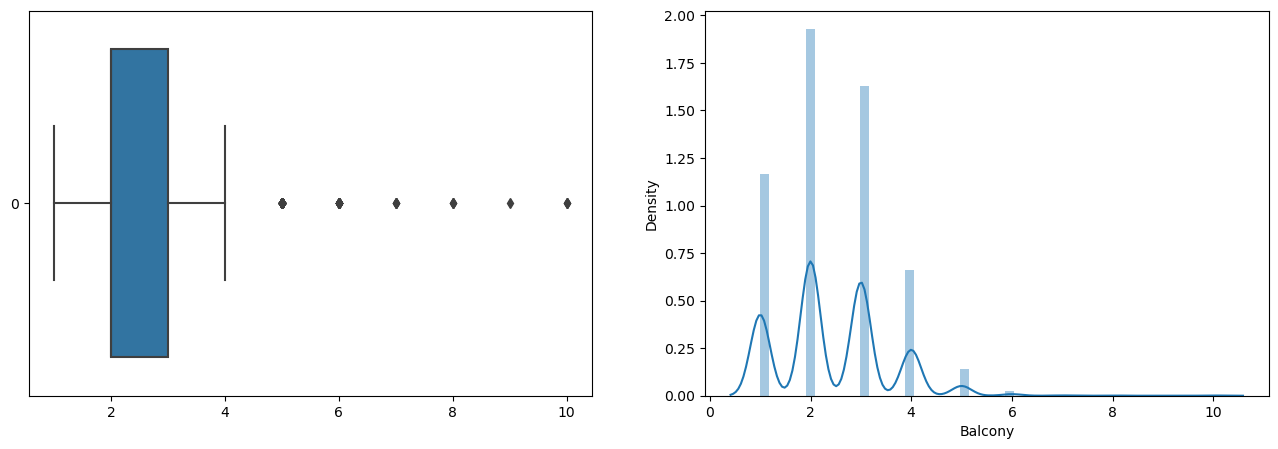

In [42]:
boxHistPlot(df["Balcony"])

In [43]:
df['Balcony'].value_counts()

Balcony
2.0     1793
3.0     1516
1.0     1082
4.0      613
5.0      130
6.0       21
7.0        4
10.0       3
8.0        3
9.0        1
Name: count, dtype: int64

In [44]:
df['Balcony'].isnull().sum()

2572

In [45]:
median_balcony = df_mvi['Balcony'].median()
df_mvi['Balcony'].fillna(median_balcony, inplace=True)

In [46]:
df_mvi['Balcony'].isnull().sum()

0

In [47]:
df_mvi['Balcony'].value_counts()

Balcony
2.0     4365
3.0     1516
1.0     1082
4.0      613
5.0      130
6.0       21
7.0        4
10.0       3
8.0        3
9.0        1
Name: count, dtype: int64

C:\Users\suvan\AppData\Local\Temp\ipykernel_12596\1956408900.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)
C:\Users\suvan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


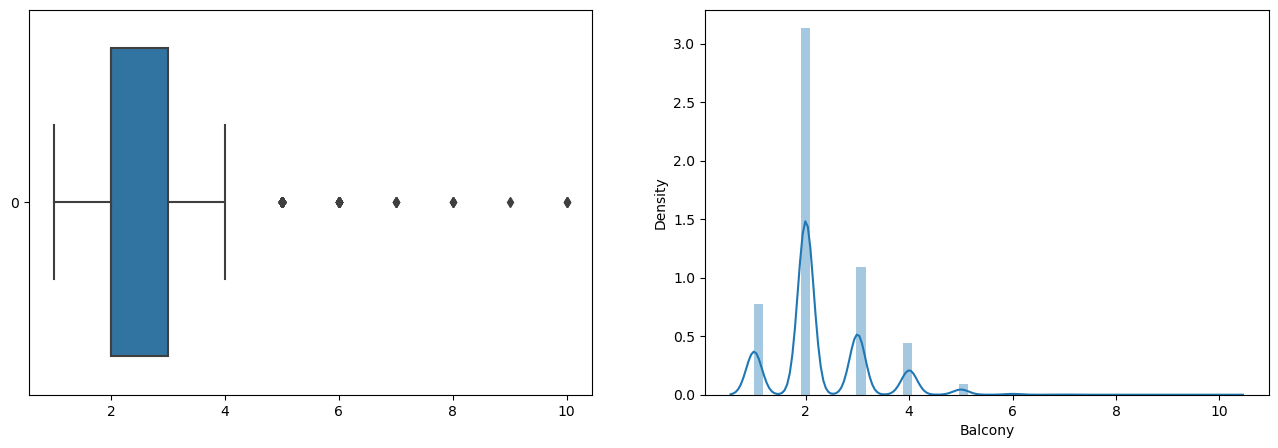

In [48]:
boxHistPlot(df_mvi["Balcony"])

#### Handling parking = 66.244508

In [49]:
df_mvi['parking'].value_counts()

parking
1.0      1715
2.0       640
3.0       110
4.0        45
6.0        14
         ... 
18.0        1
602.0       1
16.0        1
624.0       1
179.0       1
Name: count, Length: 65, dtype: int64

In [50]:
df_mvi['parking'].isnull().sum()

5126

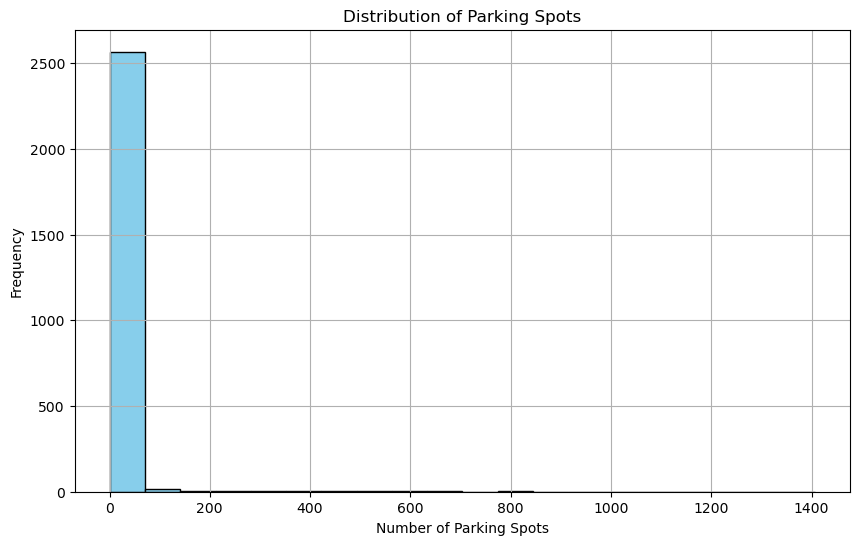

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(df['parking'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Parking Spots')
plt.ylabel('Frequency')
plt.title('Distribution of Parking Spots')
plt.grid(True)
plt.show()

In [52]:
df_mvi['parking'].fillna(0, inplace=True)

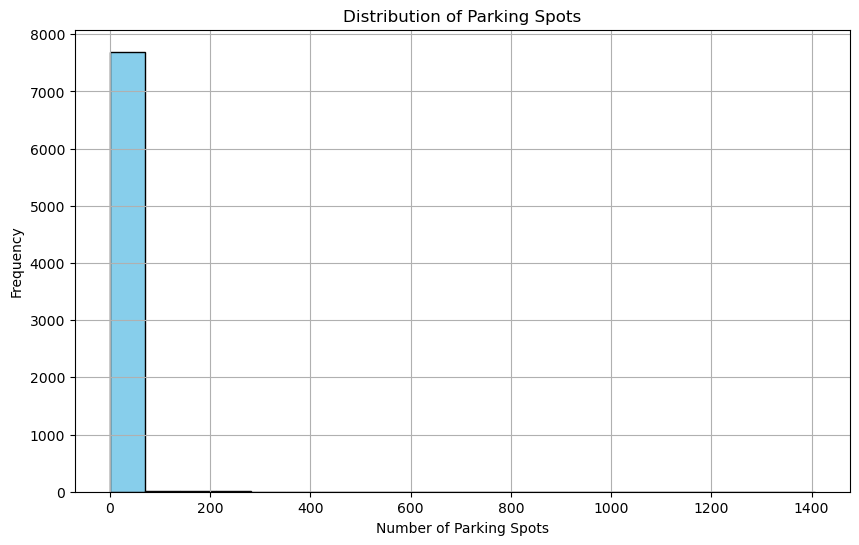

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(df_mvi['parking'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Parking Spots')
plt.ylabel('Frequency')
plt.title('Distribution of Parking Spots')
plt.grid(True)
plt.show()

In [54]:
df_mvi['parking'].value_counts()

parking
0.0      5126
1.0      1715
2.0       640
3.0       110
4.0        45
         ... 
18.0        1
602.0       1
16.0        1
624.0       1
179.0       1
Name: count, Length: 66, dtype: int64

In [55]:
df_mvi['parking'].isnull().sum()

0

#### Handling Lift = 77.604032

In [56]:
df_mvi['Lift'].value_counts()

Lift
2.0     800
1.0     296
0.0     269
3.0     258
4.0      86
6.0       8
5.0       7
7.0       4
10.0      2
8.0       2
9.0       1
Name: count, dtype: int64

In [57]:
df_mvi['Lift'].isnull().sum()

6005

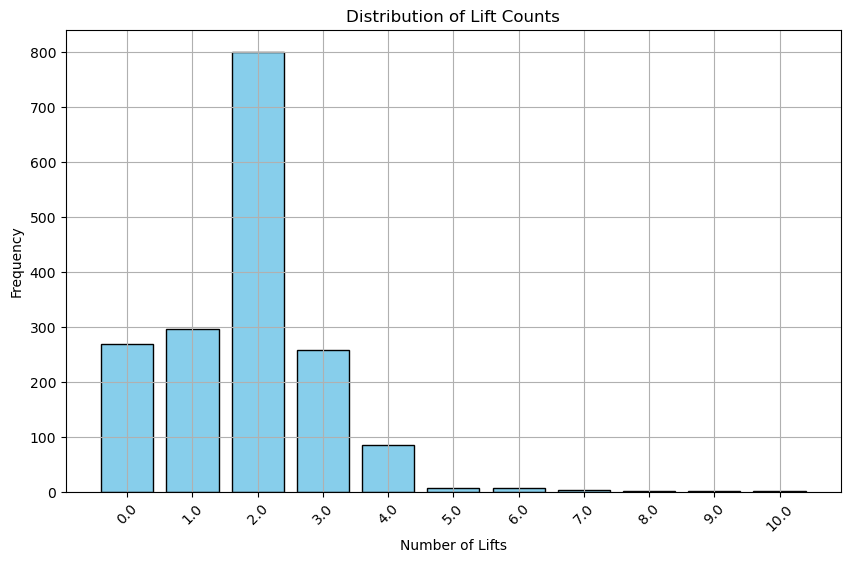

In [58]:
plt.figure(figsize=(10, 6))
lift_counts = df_mvi['Lift'].value_counts().sort_index()
plt.bar(lift_counts.index.astype(str), lift_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Lifts')
plt.ylabel('Frequency')
plt.title('Distribution of Lift Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [59]:
df_mvi.head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft,kitchen
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,2.0,Under Construction,New Property,0.0,Semi-Furnished,2.0,No Landmark,Flat,\n\n\n Welcome ...,4148.148148,1
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,2.0,Ready to Move,New Property,0.0,Semi-Furnished,2.0,No Landmark,Flat,\n\n\n Mapsko M...,5906.040268,1
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,2.0,Ready to Move,New Property,1.0,Unfurnished,NaN,No Landmark,Flat,\n\n\n This pro...,6918.238994,2
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,Ready to Move,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429,2
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,Semi-Furnished,3.0,No Landmark,Flat,\n\n\n The prop...,4592.592593,2


In [60]:
df_mvi[df_mvi['type_of_building'] != 'Flat'].head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft,kitchen
15,9500000.0,"Sector 24 Rohini, New Delhi - Rohini, Delhi NCR",1000.0,28.721436,77.107018,3.0,2.0,1.0,Ready to Move,New Property,2.0,Semi-Furnished,1.0,Near by the sovereign school,Individual House,\n \n \n...,9500.000000,2
16,15000000.0,"Sector 24 Rohini, New Delhi - Rohini, Delhi NCR",1450.0,28.727213,77.096062,4.0,3.0,1.0,Ready to Move,New Property,2.0,Semi-Furnished,1.0,Near by shri jagannath mandir,Individual House,\n\n\n 4 BHK th...,10344.827586,2
22,13000000.0,"Sector 29, Noida, Delhi NCR",1950.0,28.569737,77.332412,3.0,3.0,2.0,Ready to Move,Resale,0.0,Semi-Furnished,NaN,No Landmark,Individual House,\n \n \n...,6666.666667,1
27,10000000.0,"Sector 16 Vasundhara, Ghaziabad, Delhi NCR",1836.0,28.657161,77.355748,3.0,2.0,2.0,Ready to Move,Resale,0.0,Semi-Furnished,NaN,No Landmark,Individual House,\n,5446.623094,2
32,13500000.0,"Adhunik CGHS, Opp Tau Devil Lal Bio DiversitPa...",2150.0,28.435209,77.090225,3.0,3.0,4.0,Ready to Move,Resale,1.0,Semi-Furnished,NaN,No Landmark,Individual House,\n,6279.069767,2


In [61]:
lift_null_counts = df_mvi[df_mvi['Lift'].isnull()].groupby('type_of_building').size()
lift_null_counts

type_of_building
Flat                4830
Individual House    1175
dtype: int64

In [62]:
lift_mean = round(df_mvi['Lift'].mean())
for index, row in df_mvi.iterrows():
    if pd.isna(row['Lift']):
        if row['type_of_building'] == 'Flat':
            df_mvi.at[index, 'Lift'] = lift_mean
        elif row['type_of_building'] == 'Individual House':
            df_mvi.at[index, 'Lift'] = 0

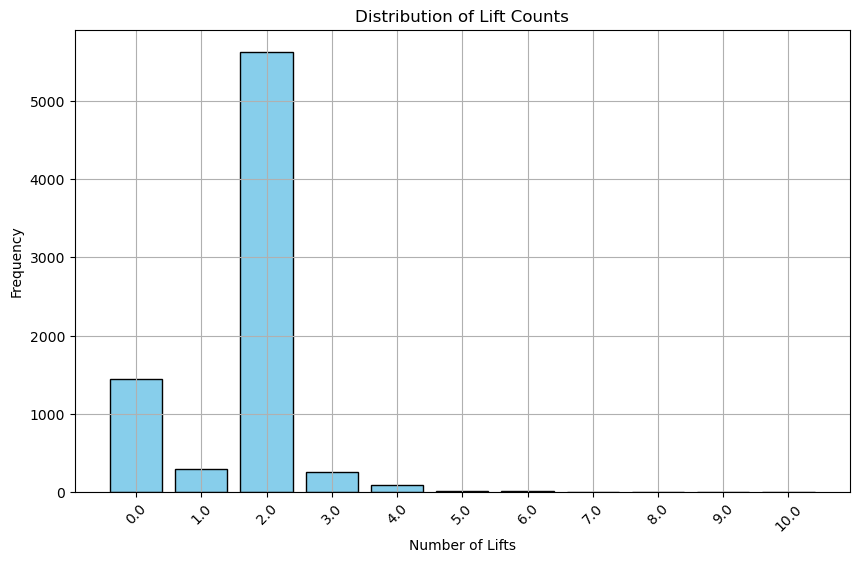

In [63]:
plt.figure(figsize=(10, 6))
lift_counts = df_mvi['Lift'].value_counts().sort_index()
plt.bar(lift_counts.index.astype(str), lift_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Lifts')
plt.ylabel('Frequency')
plt.title('Distribution of Lift Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [64]:
df_mvi['Lift'].value_counts()

Lift
2.0     5630
0.0     1444
1.0      296
3.0      258
4.0       86
6.0        8
5.0        7
7.0        4
10.0       2
8.0        2
9.0        1
Name: count, dtype: int64

In [65]:
df_mvi.isnull().sum()

price               0
Address             0
area                0
latitude            0
longitude           0
Bedrooms            0
Bathrooms           0
Balcony             0
Status              0
neworold            0
parking             0
Furnished_status    0
Lift                0
Landmarks           0
type_of_building    0
desc                0
Price_sqft          0
kitchen             0
dtype: int64

## Analyzing the Dataset after cleaning null values

In [66]:
df_mvi.columns

Index(['price', 'Address', 'area', 'latitude', 'longitude', 'Bedrooms',
       'Bathrooms', 'Balcony', 'Status', 'neworold', 'parking',
       'Furnished_status', 'Lift', 'Landmarks', 'type_of_building', 'desc',
       'Price_sqft', 'kitchen'],
      dtype='object')

In [67]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7738 non-null   float64
 1   Address           7738 non-null   object 
 2   area              7738 non-null   float64
 3   latitude          7738 non-null   float64
 4   longitude         7738 non-null   float64
 5   Bedrooms          7738 non-null   float64
 6   Bathrooms         7738 non-null   float64
 7   Balcony           7738 non-null   float64
 8   Status            7738 non-null   object 
 9   neworold          7738 non-null   object 
 10  parking           7738 non-null   float64
 11  Furnished_status  7738 non-null   object 
 12  Lift              7738 non-null   float64
 13  Landmarks         7738 non-null   object 
 14  type_of_building  7738 non-null   object 
 15  desc              7738 non-null   object 
 16  Price_sqft        7738 non-null   float64


In [68]:
df_mvi.select_dtypes(include=['object']).columns

Index(['Address', 'Status', 'neworold', 'Furnished_status', 'Landmarks',
       'type_of_building', 'desc'],
      dtype='object')

## Feature Engineering

### Ordinal Encoding

In [69]:
df_mvi_backup = df_mvi.copy()

#### Encoding 'Status'

In [70]:
df_mvi['Status'].value_counts()

Status
Ready to Move         7722
Under Construction      16
Name: count, dtype: int64

In [71]:
df_mvi['Status'] = df_mvi['Status'].astype(CategoricalDtype(categories=["Under Construction", "Ready to Move"], ordered=True)).cat.codes

In [72]:
df_mvi['Status'].value_counts()

Status
1    7722
0      16
Name: count, dtype: int64

#### Encoding 'Furnished_status'

In [73]:
df_mvi['Furnished_status'].value_counts()

Furnished_status
Semi-Furnished    5813
Unfurnished       1230
Furnished          695
Name: count, dtype: int64

In [74]:
df_mvi['Furnished_status'] = df_mvi['Furnished_status'].astype(CategoricalDtype(categories=["Unfurnished", "Semi-Furnished", "Furnished"], ordered=True)).cat.codes

In [75]:
df_mvi['Furnished_status'].value_counts()

Furnished_status
1    5813
0    1230
2     695
Name: count, dtype: int64

### One-Hot Encoding

In [76]:
object_features = df_mvi.select_dtypes(include=['object']).columns

In [77]:
df_encod = df_mvi.copy()

In [78]:
df_encod[object_features].head()

,Address,neworold,Landmarks,type_of_building,desc
0,"Noida Extension, Noida, Delhi NCR",New Property,No Landmark,Flat,\n\n\n Welcome ...
1,"Sector 79, Gurgaon, Delhi NCR",New Property,No Landmark,Flat,\n\n\n Mapsko M...
2,"Vaishali, Ghaziabad, Delhi NCR",New Property,No Landmark,Flat,\n\n\n This pro...
3,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",New Property,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...
4,"Jaypee Pavilion Court Sector 128, Noida, Secto...",Resale,No Landmark,Flat,\n\n\n The prop...


#### Encoding 'neworold'

In [79]:
df_mvi['neworold'].value_counts()

neworold
Resale          6905
New Property     833
Name: count, dtype: int64

In [80]:
df_encod = pd.get_dummies(df_encod, columns=['neworold'], prefix='neworold', drop_first=False)

In [81]:
df_encod.head(1)

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft,kitchen,neworold_New Property,neworold_Resale
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.60885,77.46056,3.0,3.0,2.0,0,0.0,1,2.0,No Landmark,Flat,\n\n\n Welcome ...,4148.148148,1,True,False


#### Encoding 'type_of_building'

In [82]:
df_mvi['type_of_building'].value_counts()

type_of_building
Flat                6226
Individual House    1512
Name: count, dtype: int64

In [83]:
df_encod = pd.get_dummies(df_encod, columns=['type_of_building'], prefix='type_of_building', drop_first=False)

In [84]:
df_encod.head(1)

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,parking,Furnished_status,Lift,Landmarks,desc,Price_sqft,kitchen,neworold_New Property,neworold_Resale,type_of_building_Flat,type_of_building_Individual House
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.60885,77.46056,3.0,3.0,2.0,0,0.0,1,2.0,No Landmark,\n\n\n Welcome ...,4148.148148,1,True,False,True,False


## Analyzing Remaining Catagorical Values

In [85]:
df_encod[df_encod.select_dtypes(include=['object']).columns].head()

,Address,Landmarks,desc
0,"Noida Extension, Noida, Delhi NCR",No Landmark,\n\n\n Welcome ...
1,"Sector 79, Gurgaon, Delhi NCR",No Landmark,\n\n\n Mapsko M...
2,"Vaishali, Ghaziabad, Delhi NCR",No Landmark,\n\n\n This pro...
3,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",near Gaur Mulberry Mansion,\n\n\n AIG Roya...
4,"Jaypee Pavilion Court Sector 128, Noida, Secto...",No Landmark,\n\n\n The prop...


In [86]:
df_encod.head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,parking,Furnished_status,Lift,Landmarks,desc,Price_sqft,kitchen,neworold_New Property,neworold_Resale,type_of_building_Flat,type_of_building_Individual House
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,2.0,0,0.0,1,2.0,No Landmark,\n\n\n Welcome ...,4148.148148,1,True,False,True,False
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,2.0,1,0.0,1,2.0,No Landmark,\n\n\n Mapsko M...,5906.040268,1,True,False,True,False
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,2.0,1,1.0,0,2.0,No Landmark,\n\n\n This pro...,6918.238994,2,True,False,True,False
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,1,1.0,0,2.0,near Gaur Mulberry Mansion,\n\n\n AIG Roya...,3628.571429,2,True,False,True,False
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,1,1.0,1,3.0,No Landmark,\n\n\n The prop...,4592.592593,2,False,True,True,False


In [87]:
df_encod['Address'].nunique()

4145

In [88]:
df_encod['Address'].value_counts().unique

<bound method Series.unique of Address
Raj Nagar Extension, Ghaziabad, Delhi NCR                                     163
Indirapuram, Ghaziabad, Delhi NCR                                             152
Greater Noida West, Greater Noida, Delhi NCR                                  100
Noida Extension, Noida, Delhi NCR                                              63
NH 24, Ghaziabad, Delhi NCR                                                    61
                                                                             ... 
e block sector 57, Sector 57, Gurgaon, Delhi NCR                                1
Ramakrishna apartment, Indraprastha Extension, New Delhi - East, Delhi NCR      1
Rajnagar Extension Gahziabad, Raj Nagar Extension, Ghaziabad, Delhi NCR         1
Rajendra Park, Rajendra Park, Gurgaon, Delhi NCR                                1
sandal apartment, Shalimar Garden Extension 1, Ghaziabad, Delhi NCR             1
Name: count, Length: 4145, dtype: int64>

In [89]:
df_encod['Landmarks'].nunique()

2613

In [90]:
df_encod

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,parking,Furnished_status,Lift,Landmarks,desc,Price_sqft,kitchen,neworold_New Property,neworold_Resale,type_of_building_Flat,type_of_building_Individual House
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,2.0,0,0.0,1,2.0,No Landmark,\n\n\n Welcome ...,4148.148148,1,True,False,True,False
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,2.0,1,0.0,1,2.0,No Landmark,\n\n\n Mapsko M...,5906.040268,1,True,False,True,False
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,2.0,1,1.0,0,2.0,No Landmark,\n\n\n This pro...,6918.238994,2,True,False,True,False
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,1,1.0,0,2.0,near Gaur Mulberry Mansion,\n\n\n AIG Roya...,3628.571429,2,True,False,True,False
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,1,1.0,1,3.0,No Landmark,\n\n\n The prop...,4592.592593,2,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7733,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,28.635272,77.370395,2.0,2.0,2.0,1,0.0,1,2.0,No Landmark,\n \n \n...,7214.611872,2,False,True,True,False
7734,4510000.0,"Greater Noida, Sector 2, Greater Noida, Delhi NCR",1060.0,28.581431,77.452819,2.0,2.0,3.0,1,0.0,1,2.0,ek murti chowk,\n \n \n...,4254.716981,1,False,True,True,False
7735,7000000.0,"Crossings Republik, Ghaziabad, Delhi NCR",1898.0,28.625850,77.435336,4.0,3.0,5.0,1,0.0,1,2.0,No Landmark,\n \n \n...,3688.092729,2,False,True,True,False
7736,6500000.0,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400.0,28.701622,77.430153,3.0,3.0,2.0,1,1.0,1,3.0,vvip mall,\n \n \n...,4642.857143,1,False,True,True,False


### Adding pincode feature which is derived from latitude and longitude

In [91]:
pincode = pd.read_csv("pincode generation\pincode_complete.csv")
pincode

,pincode
0,201318
1,122050
2,201301
3,201301
4,201304
...,...
7733,201014
7734,201318
7735,201016
7736,201017


In [92]:
df_encod = pd.concat([df_encod, pincode], axis=1)

In [93]:
df_encod.head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,parking,Furnished_status,Lift,Landmarks,desc,Price_sqft,kitchen,neworold_New Property,neworold_Resale,type_of_building_Flat,type_of_building_Individual House,pincode
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,2.0,0,0.0,1,2.0,No Landmark,\n\n\n Welcome ...,4148.148148,1,True,False,True,False,201318
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,2.0,1,0.0,1,2.0,No Landmark,\n\n\n Mapsko M...,5906.040268,1,True,False,True,False,122050
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,2.0,1,1.0,0,2.0,No Landmark,\n\n\n This pro...,6918.238994,2,True,False,True,False,201301
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,1,1.0,0,2.0,near Gaur Mulberry Mansion,\n\n\n AIG Roya...,3628.571429,2,True,False,True,False,201301
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,1,1.0,1,3.0,No Landmark,\n\n\n The prop...,4592.592593,2,False,True,True,False,201304


### Dropping unnecessary attribute after adding pincode

In [94]:
df_encod_backup = df_encod
df_encod.drop(columns=['Address', 'Landmarks', 'desc', 'latitude', 'longitude'], inplace=True)
df_encod.head(2)

,price,area,Bedrooms,Bathrooms,Balcony,Status,parking,Furnished_status,Lift,Price_sqft,kitchen,neworold_New Property,neworold_Resale,type_of_building_Flat,type_of_building_Individual House,pincode
0,5600000.0,1350.0,3.0,3.0,2.0,0,0.0,1,2.0,4148.148148,1,True,False,True,False,201318
1,8800000.0,1490.0,3.0,3.0,2.0,1,0.0,1,2.0,5906.040268,1,True,False,True,False,122050


In [95]:
df_encod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              7738 non-null   float64
 1   area                               7738 non-null   float64
 2   Bedrooms                           7738 non-null   float64
 3   Bathrooms                          7738 non-null   float64
 4   Balcony                            7738 non-null   float64
 5   Status                             7738 non-null   int8   
 6   parking                            7738 non-null   float64
 7   Furnished_status                   7738 non-null   int8   
 8   Lift                               7738 non-null   float64
 9   Price_sqft                         7738 non-null   float64
 10  kitchen                            7738 non-null   int64  
 11  neworold_New Property              7738 non-null   bool 

In [96]:
print("Null values: ", df_encod['pincode'].isnull().sum())
print("Unique values: ", df_encod['pincode'].nunique())

Null values:  0
Unique values:  147


## Handling Outliers

In [97]:
df_encod.shape

(7738, 16)

In [99]:
df_encod_bak = df_encod.copy()

In [100]:
df_encod.describe()

,price,area,Bedrooms,Bathrooms,Balcony,Status,parking,Furnished_status,Lift,Price_sqft,kitchen,pincode
count,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000
mean,8.320635e+06,1409.506591,2.708193,2.501163,2.284699,0.997932,2.590075,0.930861,1.658051,5543.660241,1.602869,161939.038640
std,7.223197e+06,718.929581,0.877026,0.867050,0.907924,0.045428,35.284881,0.493987,0.903027,2408.659307,0.820808,43276.929824
min,1.700000e+06,501.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2100.000000,1.000000,100011.000000
25%,4.200000e+06,990.000000,2.000000,2.000000,2.000000,1.000000,0.000000,1.000000,2.000000,3950.986915,1.000000,121101.000000
50%,6.000000e+06,1250.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,2.000000,4972.674332,2.000000,201002.000000
75%,9.500000e+06,1650.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,6350.638693,2.000000,201301.000000
max,8.500000e+07,9500.000000,10.000000,10.000000,10.000000,1.000000,1406.000000,2.000000,10.000000,44378.698225,10.000000,420420.000000


In [103]:
min_thrsld, max_thrsld = df_encod.Price_sqft.quantile([0.001, 0.999])
min_thrsld, max_thrsld

(2465.87938546205, 21434.829059829946)

In [104]:
df_encod[df_encod.Price_sqft < min_thrsld]

,price,area,Bedrooms,Bathrooms,Balcony,Status,parking,Furnished_status,Lift,Price_sqft,kitchen,neworold_New Property,neworold_Resale,type_of_building_Flat,type_of_building_Individual House,pincode
299,2200000.0,900.0,2.0,2.0,1.0,1,0.0,1,0.0,2444.444444,1,False,True,False,True,110094
1574,3000000.0,1244.0,3.0,2.0,2.0,1,0.0,0,2.0,2411.575563,2,False,True,True,False,201016
1679,2100000.0,1000.0,2.0,2.0,1.0,1,0.0,1,2.0,2100.000000,1,True,False,True,False,110094
1995,2200000.0,955.0,2.0,2.0,2.0,1,0.0,1,2.0,2303.664921,2,False,True,True,False,201017
2568,2400000.0,980.0,2.0,2.0,1.0,1,0.0,1,2.0,2448.979592,2,False,True,True,False,201004
2706,2200000.0,900.0,2.0,2.0,2.0,1,0.0,1,0.0,2444.444444,1,False,True,False,True,110094
6620,1700000.0,750.0,2.0,2.0,1.0,1,0.0,1,2.0,2266.666667,1,True,False,True,False,110094
7142,2580000.0,1100.0,3.0,2.0,2.0,1,0.0,1,0.0,2345.454545,1,True,False,False,True,121006


In [105]:
df_encod = df_encod[df_encod['Price_sqft']< 40000]

In [106]:
df_encod.shape

(7735, 16)

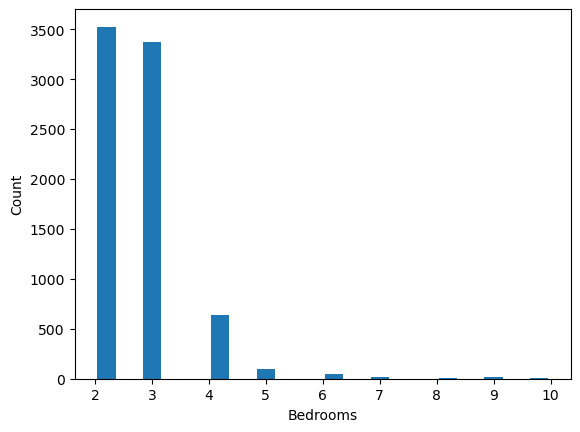

In [107]:
plt.hist(df_encod.Bedrooms, bins=20, rwidth=0.8)
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

In [108]:
dfx = df_encod[df_encod['Bedrooms']>=7]
print(dfx)

           price    area  Bedrooms  Bathrooms  Balcony  Status  parking  \
151   45000000.0  9000.0      10.0       10.0     10.0       1     10.0   
316   35000000.0  8500.0      10.0        7.0      7.0       1      3.0   
352   30000000.0  4500.0       7.0        5.0      2.0       1      2.0   
1094  14000000.0   720.0       8.0        4.0      4.0       1      2.0   
1654  14500000.0  3330.0       7.0        5.0      2.0       1      3.0   
1788  25000000.0  3744.0      10.0        8.0      4.0       1      1.0   
1882   8000000.0  1000.0       8.0        6.0      2.0       1      0.0   
2008  37500000.0  5000.0       8.0        7.0      2.0       1      0.0   
2191  25000000.0  3400.0       7.0        8.0      2.0       1      0.0   
2252  46000000.0  5400.0       9.0        9.0      2.0       1      0.0   
2357  35000000.0  2960.0       7.0        7.0      1.0       1      0.0   
2498  13000000.0  2500.0       9.0        5.0      2.0       1      0.0   
2619   9350000.0   900.0 

In [109]:
con = df_encod['Bathrooms'] <= df_encod['Bedrooms']
df_encod = df_encod[con]

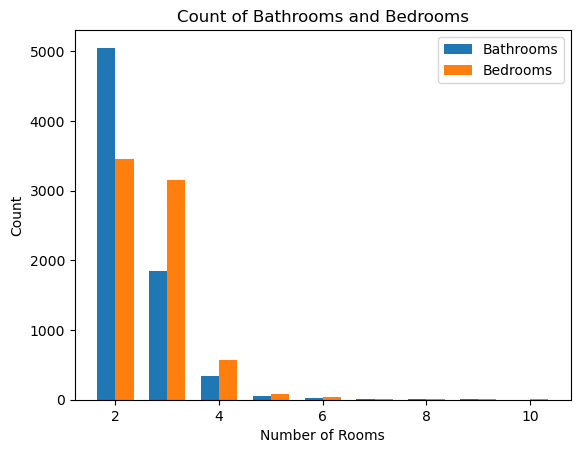

In [110]:
bathroom_counts = df_encod['Bathrooms'].value_counts()
bedroom_counts = df_encod['Bedrooms'].value_counts()

bar_width = 0.35
fig, ax = plt.subplots()
ax.bar(bathroom_counts.index - bar_width/2, bathroom_counts.values, width=bar_width, label='Bathrooms')
ax.bar(bedroom_counts.index + bar_width/2, bedroom_counts.values, width=bar_width, label='Bedrooms')
ax.set_xlabel('Number of Rooms')
ax.set_ylabel('Count')
ax.set_title('Count of Bathrooms and Bedrooms')
ax.legend()

plt.show()

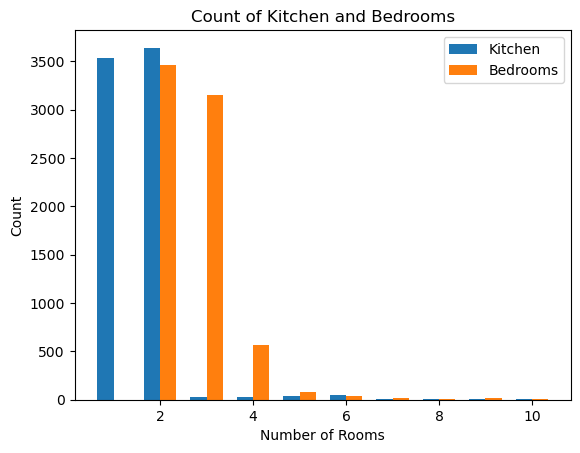

In [111]:
kitchen_counts = df_encod['kitchen'].value_counts()
bedroom_counts = df_encod['Bedrooms'].value_counts()

bar_width = 0.35
fig, ax = plt.subplots()
ax.bar(kitchen_counts.index - bar_width/2, kitchen_counts.values, width=bar_width, label='Kitchen')
ax.bar(bedroom_counts.index + bar_width/2, bedroom_counts.values, width=bar_width, label='Bedrooms')
ax.set_xlabel('Number of Rooms')
ax.set_ylabel('Count')
ax.set_title('Count of Kitchen and Bedrooms')
ax.legend()

plt.show()

In [112]:
dfy = df_encod[df_encod['Bedrooms']< df_encod['kitchen']]
print(dfy)

           price    area  Bedrooms  Bathrooms  Balcony  Status  parking  \
1702  14000000.0  2600.0       5.0        5.0      2.0       1      0.0   
1836  36700000.0  3670.0       5.0        5.0      4.0       1      2.0   
2235  19000000.0  2400.0       5.0        4.0      4.0       1      0.0   
2336   5500000.0  1260.0       5.0        3.0      2.0       1      0.0   
2785   9000000.0  1000.0       5.0        3.0      2.0       1      0.0   
2888  29900000.0  3500.0       5.0        5.0      2.0       1      0.0   
2958  13500000.0  2250.0       5.0        3.0      2.0       1      0.0   
3006  45000000.0  4230.0       5.0        4.0      2.0       1      0.0   
3032  32500000.0  2700.0       5.0        5.0      3.0       1      4.0   
3098  32500000.0  3387.0       5.0        5.0      2.0       1      0.0   
3210  20000000.0  3400.0       5.0        5.0      2.0       1      0.0   
3225  15000000.0  2500.0       5.0        3.0      4.0       1      0.0   
3253  26500000.0  2650.0 

In [113]:
con1 = df_encod['kitchen'] <= df_encod['Bedrooms']
df_encod = df_encod[con1]

In [114]:
df_encod.shape

(7320, 16)

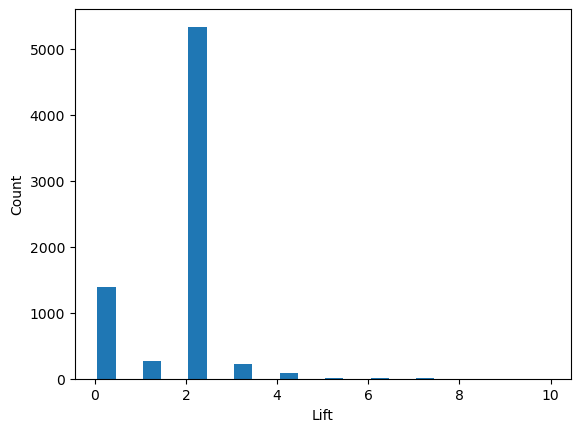

In [115]:
plt.hist(df_encod.Lift, bins=20, rwidth=0.8)
plt.xlabel('Lift')
plt.ylabel('Count')
plt.show()

In [116]:
con2 = df_encod['Balcony'] <= df_encod['Bedrooms']
df_encod = df_encod[con2]

In [117]:
df_encod.shape

(6224, 16)

In [118]:
null_count = df_encod.isna().sum()
print(null_count)

price                                0
area                                 0
Bedrooms                             0
Bathrooms                            0
Balcony                              0
Status                               0
parking                              0
Furnished_status                     0
Lift                                 0
Price_sqft                           0
kitchen                              0
neworold_New Property                0
neworold_Resale                      0
type_of_building_Flat                0
type_of_building_Individual House    0
pincode                              0
dtype: int64


In [119]:
df_encod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6224 entries, 0 to 7737
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              6224 non-null   float64
 1   area                               6224 non-null   float64
 2   Bedrooms                           6224 non-null   float64
 3   Bathrooms                          6224 non-null   float64
 4   Balcony                            6224 non-null   float64
 5   Status                             6224 non-null   int8   
 6   parking                            6224 non-null   float64
 7   Furnished_status                   6224 non-null   int8   
 8   Lift                               6224 non-null   float64
 9   Price_sqft                         6224 non-null   float64
 10  kitchen                            6224 non-null   int64  
 11  neworold_New Property              6224 non-null   bool   
 1

## Split data for Training and Testing

In [120]:
df_encod.shape

(6224, 16)

In [121]:
X = df_encod.drop('price', axis=1)
Y = df_encod['price']

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

## Training Models

In [123]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import SGDRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

In [124]:
lr = LinearRegression()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()

In [125]:
models = {"a":["LinearRegression", lr],
          "b": ["SGDRegressor", sgdr],
          "c": ["KNeighbors Regressor", knr],
          "d": ["GaussianProcess Regressor", gpr],
          "e":["Decision TreeRegressor", dtr],
          "f": ["GradientBoosting Regressor", gbr],
          "g":["Random Forest Regressor", rfr],
          "h": ["XGBRegressor", xgbr],
         }

In [126]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train, Y_train):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, Y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score

In [127]:
models_score = []
for model in models:
    print("Training model: ", models[model][0])
    score = test_model(models[model][1], X_train, Y_train)
    print("Score of model: ", score)
    models_score.append([models[model][0], score[0]])
    print("")

Training model:  LinearRegression
Score of model:  [0.9435590338395304]

Training model:  SGDRegressor
Score of model:  [-6.295093309176763e+23]

Training model:  KNeighbors Regressor
Score of model:  [0.9527123381087812]

Training model:  GaussianProcess Regressor
Score of model:  [-1.5027968665081193]

Training model:  Decision TreeRegressor
Score of model:  [0.9823655231298927]

Training model:  GradientBoosting Regressor
Score of model:  [0.9929082071791182]

Training model:  Random Forest Regressor
Score of model:  [0.9925545969467808]

Training model:  XGBRegressor
Score of model:  [0.9891225400112676]



In [128]:
models_score

[['LinearRegression', 0.9435590338395304],
 ['SGDRegressor', -6.295093309176763e+23],
 ['KNeighbors Regressor', 0.9527123381087812],
 ['GaussianProcess Regressor', -1.5027968665081193],
 ['Decision TreeRegressor', 0.9823655231298927],
 ['GradientBoosting Regressor', 0.9929082071791182],
 ['Random Forest Regressor', 0.9925545969467808],
 ['XGBRegressor', 0.9891225400112676]]

## Cross Validation

### Linear Regression

In [129]:
lr.fit(X_train, Y_train)
predictions_lr = lr.predict(X_test)
print(predictions_lr)

[ 5531618.00880986 14198248.00504351  4177801.96404161 ...
  8725271.31218559  2923974.70374235  2596032.29253832]


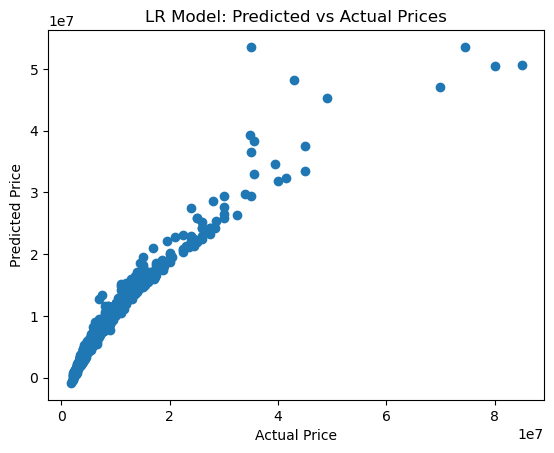

In [130]:
plt.scatter(Y_test, predictions_lr)  # Scatter plot of actual vs predicted prices
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("LR Model: Predicted vs Actual Prices")
plt.show()

### SGD Regressor

In [131]:
sgdr.fit(X_train, Y_train)
predictions_sgdr = sgdr.predict(X_test)
print(predictions_sgdr)

[2.60116700e+18 2.84482098e+18 4.85721749e+18 ... 4.82908394e+18
 2.88840687e+18 4.85834084e+18]


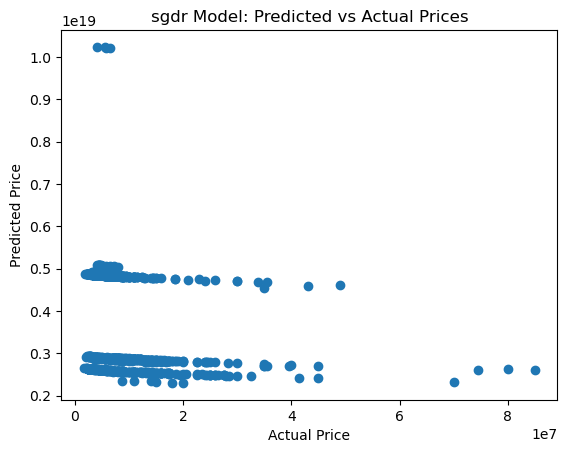

In [132]:
plt.scatter(Y_test, predictions_sgdr)  # Scatter plot of actual vs predicted prices
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("sgdr Model: Predicted vs Actual Prices")
plt.show()

### KNeighbors Regressor

In [133]:
knr.fit(X_train, Y_train)
predictions_knr = knr.predict(X_test)
print(predictions_knr)

[ 5780000. 13460000.  4540000. ...  7890000.  4100000.  3530000.]


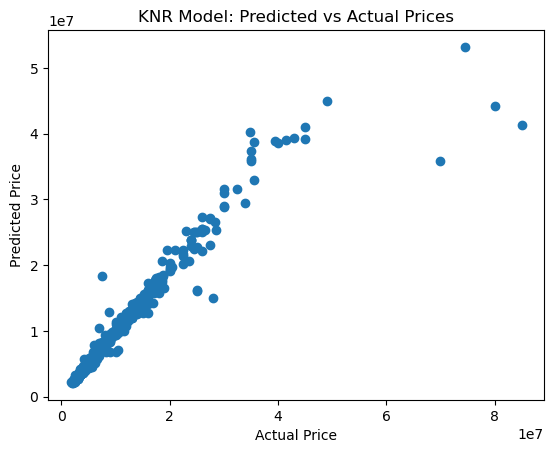

In [134]:
plt.scatter(Y_test, predictions_knr)  # Scatter plot of actual vs predicted prices
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNR Model: Predicted vs Actual Prices")
plt.show()

### Gaussian Process

In [135]:
gpr.fit(X_train, Y_train)
predictions_gpr = gpr.predict(X_test)
print(predictions_gpr)

[4.73971370e+000 0.00000000e+000 1.23184395e-103 ... 3.46378042e-118
 4.85944222e-189 2.94821231e-005]


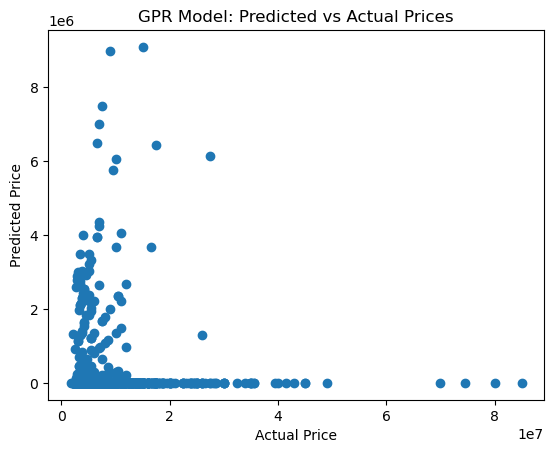

In [136]:
plt.scatter(Y_test, predictions_gpr)  # Scatter plot of actual vs predicted prices
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("GPR Model: Predicted vs Actual Prices")
plt.show()

### Decision TreeRegressor

In [137]:
dtr.fit(X_train, Y_train)
predictions_dtr = dtr.predict(X_test)
print(predictions_dtr)

[ 5700000. 14000000.  4500000. ...  7800000.  4200000.  3500000.]


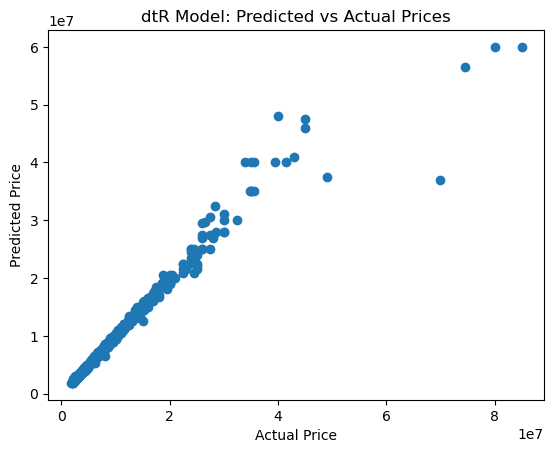

In [138]:
plt.scatter(Y_test, predictions_dtr)  # Scatter plot of actual vs predicted prices
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("dtR Model: Predicted vs Actual Prices")
plt.show()

### GradientBoostingRegressor

In [139]:
gbr.fit(X_train, Y_train)
predictions_gbr = gbr.predict(X_test)
print(predictions_gbr)

[ 5678661.64175543 12877952.69180722  4561217.70257778 ...
  7621767.43285788  3970872.00532833  3703417.45687921]


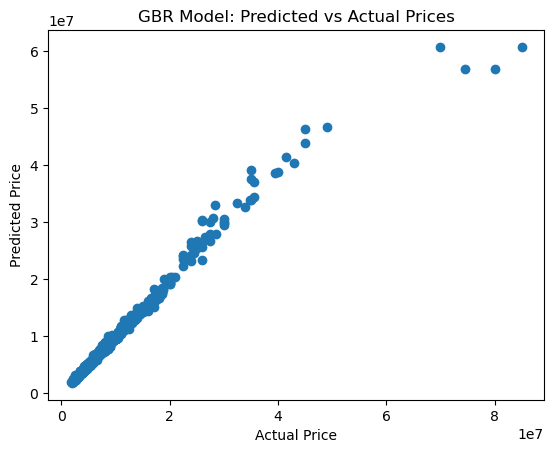

In [140]:
plt.scatter(Y_test, predictions_gbr)  # Scatter plot of actual vs predicted prices
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("GBR Model: Predicted vs Actual Prices")
plt.show()

### Random Forest Regressor

In [141]:
rfr.fit(X_train, Y_train)
predictions_rfr = rfr.predict(X_test)
print(predictions_rfr)

[ 5716000. 13566000.  4496500. ...  7775000.  4109700.  3506000.]


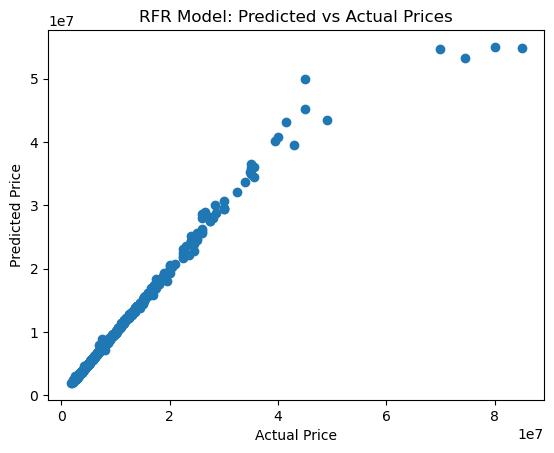

In [142]:
plt.scatter(Y_test, predictions_rfr)  # Scatter plot of actual vs predicted prices
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("RFR Model: Predicted vs Actual Prices")
plt.show()

### XGBRegressor

In [143]:
xgbr.fit(X_train, Y_train)
predictions_xgb = xgbr.predict(X_test)
print(predictions_xgb)

[ 5488517.5 13620472.   4385731.  ...  7660432.   4248559.   3487261.2]


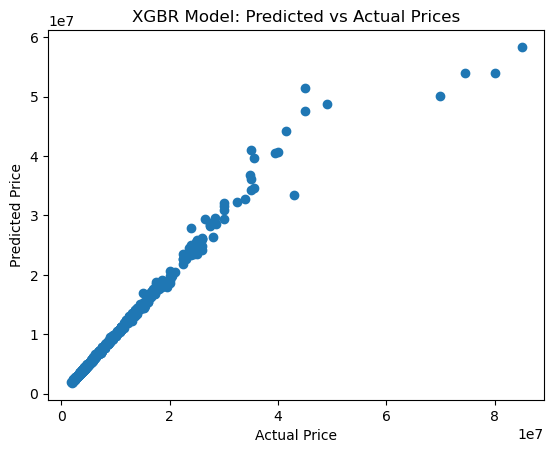

In [144]:
plt.scatter(Y_test, predictions_xgb)  # Scatter plot of actual vs predicted prices
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBR Model: Predicted vs Actual Prices")
plt.show()

In [145]:
from sklearn.metrics import mean_squared_error

# Define models
models = {
    "Linear Regression": lr,
    "SGD Regressor": sgdr,
    "KNeighbors Regressor": knr,
    "Gaussian Process Regressor": gpr,
    "Decision Tree Regressor": dtr,
    "Gradient Boosting Regressor": gbr,
    "Random Forest Regressor": rfr,
    "XGBoost Regressor": xgbr
}

# Calculate MSE and RMSE for each model
for model_name, model in models.items():
    # Predictions for the current model
    predictions = model.predict(X_test)
    
    # Calculate MSE
    mse = mean_squared_error(Y_test, predictions)
    
    # Calculate RMSE
    rmse = np.sqrt(mse)
    
    # Print results
    print(f"{model_name} - MSE: {mse}, RMSE: {rmse}")


Linear Regression - MSE: 4254557162943.811, RMSE: 2062657.7910414056
SGD Regressor - MSE: 1.5932559843034536e+37, RMSE: 3.9915610784547113e+18
KNeighbors Regressor - MSE: 4596422930120.481, RMSE: 2143926.9880573084
Gaussian Process Regressor - MSE: 112085919948484.69, RMSE: 10587063.8020409
Decision Tree Regressor - MSE: 2349967550200.803, RMSE: 1532960.3876815615
Gradient Boosting Regressor - MSE: 1435593080724.494, RMSE: 1198162.3766103215
Random Forest Regressor - MSE: 1880673638160.6426, RMSE: 1371376.5486403224
XGBoost Regressor - MSE: 2007968614790.1501, RMSE: 1417028.092449176


In [146]:
def print_index_column_names(X):
    
    print("Index Number - Column Name")
    for idx, col_name in enumerate(X.columns):
        print(f"{idx}: {col_name}")
        
print_index_column_names(X)

Index Number - Column Name
0: area
1: Bedrooms
2: Bathrooms
3: Balcony
4: Status
5: parking
6: Furnished_status
7: Lift
8: Price_sqft
9: kitchen
10: neworold_New Property
11: neworold_Resale
12: type_of_building_Flat
13: type_of_building_Individual House
14: pincode


In [153]:
df_encod.head()

,price,area,Bedrooms,Bathrooms,Balcony,Status,parking,Furnished_status,Lift,Price_sqft,kitchen,neworold_New Property,neworold_Resale,type_of_building_Flat,type_of_building_Individual House,pincode
0,5600000.0,1350.0,3.0,3.0,2.0,0,0.0,1,2.0,4148.148148,1,True,False,True,False,201318
1,8800000.0,1490.0,3.0,3.0,2.0,1,0.0,1,2.0,5906.040268,1,True,False,True,False,122050
7,3990000.0,850.0,2.0,2.0,1.0,1,1.0,1,2.0,4694.117647,1,False,True,True,False,122006
8,3500000.0,960.0,2.0,2.0,2.0,1,0.0,1,2.0,3645.833333,2,False,True,True,False,201318
10,7300000.0,850.0,3.0,2.0,1.0,1,2.0,1,1.0,8588.235294,1,True,False,True,False,110085


In [154]:
df_encod.head()

,price,area,Bedrooms,Bathrooms,Balcony,Status,parking,Furnished_status,Lift,Price_sqft,kitchen,neworold_New Property,neworold_Resale,type_of_building_Flat,type_of_building_Individual House,pincode
0,5600000.0,1350.0,3.0,3.0,2.0,0,0.0,1,2.0,4148.148148,1,True,False,True,False,201318
1,8800000.0,1490.0,3.0,3.0,2.0,1,0.0,1,2.0,5906.040268,1,True,False,True,False,122050
7,3990000.0,850.0,2.0,2.0,1.0,1,1.0,1,2.0,4694.117647,1,False,True,True,False,122006
8,3500000.0,960.0,2.0,2.0,2.0,1,0.0,1,2.0,3645.833333,2,False,True,True,False,201318
10,7300000.0,850.0,3.0,2.0,1.0,1,2.0,1,1.0,8588.235294,1,True,False,True,False,110085


In [156]:
X

,area,Bedrooms,Bathrooms,Balcony,Status,parking,Furnished_status,Lift,Price_sqft,kitchen,neworold_New Property,neworold_Resale,type_of_building_Flat,type_of_building_Individual House,pincode
0,1350.0,3.0,3.0,2.0,0,0.0,1,2.0,4148.148148,1,True,False,True,False,201318
1,1490.0,3.0,3.0,2.0,1,0.0,1,2.0,5906.040268,1,True,False,True,False,122050
7,850.0,2.0,2.0,1.0,1,1.0,1,2.0,4694.117647,1,False,True,True,False,122006
8,960.0,2.0,2.0,2.0,1,0.0,1,2.0,3645.833333,2,False,True,True,False,201318
10,850.0,3.0,2.0,1.0,1,2.0,1,1.0,8588.235294,1,True,False,True,False,110085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,955.0,2.0,2.0,2.0,1,1.0,1,2.0,3979.057592,2,False,True,True,False,201310
7731,970.0,2.0,2.0,2.0,1,0.0,1,2.0,5670.103093,1,False,True,True,False,201001
7733,1095.0,2.0,2.0,2.0,1,0.0,1,2.0,7214.611872,2,False,True,True,False,201014
7736,1400.0,3.0,3.0,2.0,1,1.0,1,3.0,4642.857143,1,False,True,True,False,201017


In [157]:
Y

0       5600000.0
1       8800000.0
7       3990000.0
8       3500000.0
10      7300000.0
          ...    
7730    3800000.0
7731    5500000.0
7733    7900000.0
7736    6500000.0
7737    6500000.0
Name: price, Length: 6224, dtype: float64

In [158]:
def predict_price_all(model, area, bed, bath, balc, status, parking, furn, lift, price_sqft, kitc, new, resale, flat, house, pincode):

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = bed
    x[2] = bath
    x[3] = balc
    x[4] = status
    x[5] = parking
    x[6] = furn
    x[7] = lift
    x[8] = price_sqft
    x[9] = kitc
    x[10] = new
    x[11] = resale
    x[12] = flat
    x[13] = house
    x[14] = pincode

    return model.predict([x])[0]

In [159]:
def compare_models(input_list):
    
    models = [
        ("Linear Regression", lr),
        ("SGD Regressor", sgdr),
        ("KNeighbors Regressor", knr),
        ("Gaussian Process Regressor", gpr),
        ("Decision Tree Regressor", dtr),
        ("Gradient Boosting Regressor", gbr),
        ("Random Forest Regressor", rfr),
        ("XGB Regressor", xgbr)
    ]
    
    # Sample input values
    input_values = input_list
    
    # Iterate over models and make predictions
    for model_name, model in models:
        prediction = predict_price_all(model, *input_values)
        print(f"{model_name}: {prediction}")


In [160]:
compare_models([1490.0, 3.0, 3.0, 2.0, 1, 0.0, 1, 2.0, 5906.040268, 1, True, False, True, False, 122050])

Linear Regression: 9183076.077541023
SGD Regressor: 2.875441524964723e+18
KNeighbors Regressor: 8700000.0
Gaussian Process Regressor: 8799999.999119084
Decision Tree Regressor: 8800000.0
Gradient Boosting Regressor: 9009258.4593985
Random Forest Regressor: 8836700.0
XGB Regressor: 8814590.0


C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X

In [161]:
compare_models([1750.0, 3.0, 2.0, 3.0, 1, 0.0, 1, 2.0, 3714.285714, 2, True, False, True, False, 201004])

Linear Regression: 7850621.6227336
SGD Regressor: 4.826314547243091e+18
KNeighbors Regressor: 6660000.0
Gaussian Process Regressor: 6499999.999349735
Decision Tree Regressor: 6500000.0
Gradient Boosting Regressor: 6137561.619171561
Random Forest Regressor: 6506800.0
XGB Regressor: 6511553.0


C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X

In [162]:
compare_models([1060.0,2.0,2.0,3.0,1,0.0,1,2.0,4254.716981,2,False,True,True,False,201318])

Linear Regression: 4114713.2627754975
SGD Regressor: 4.857326181296698e+18
KNeighbors Regressor: 4520000.0
Gaussian Process Regressor: 6.41438801807472e-15
Decision Tree Regressor: 4600000.0
Gradient Boosting Regressor: 4497736.972544907
Random Forest Regressor: 4537200.0
XGB Regressor: 4546055.0


C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X

In [163]:
compare_models([1898.0,4.0,3.0,5.0,1,0.0,1,2.0,3688.092729,1,False,True,True,False,201016])

Linear Regression: 7674194.166738667
SGD Regressor: 4.820695179795415e+18
KNeighbors Regressor: 6900000.0
Gaussian Process Regressor: 9.293506142792593e-05
Decision Tree Regressor: 6800000.0
Gradient Boosting Regressor: 7145787.357945972
Random Forest Regressor: 6986200.0
XGB Regressor: 6930428.5


C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\suvan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X

## Finalizing Price Prediction Model

In [164]:
def predict_price(area, bed, bath, balc, status, parking, furn, lift, price_sqft, kitc, new, resale, flat, house, pincode):

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = bed
    x[2] = bath
    x[3] = balc
    x[4] = status
    x[5] = parking
    x[6] = furn
    x[7] = lift
    x[8] = price_sqft
    x[9] = kitc
    x[10] = new
    x[11] = resale
    x[12] = flat
    x[13] = house
    x[14] = pincode

    return xgbr.predict([x])[0]

In [165]:
X.iloc[5203]

area                                       875.0
Bedrooms                                     2.0
Bathrooms                                    2.0
Balcony                                      2.0
Status                                         1
parking                                      0.0
Furnished_status                               1
Lift                                         2.0
Price_sqft                           2971.428571
kitchen                                        1
neworold_New Property                      False
neworold_Resale                             True
type_of_building_Flat                       True
type_of_building_Individual House          False
pincode                                   201318
Name: 6404, dtype: object

In [166]:
Y.iloc[5203]

2600000.0

In [167]:
predict_price(1025, 2, 2, 2, 1, 0, 1, 2, 3512.195122, 2, False, True, True, False, 201206)

3584887.5

## Average Price per Square Feet

In [177]:
# Group the dataframe by 'pincode' and count unique values in 'Price_sqft' column within each group
pincode_price_counts = df_encod.groupby('pincode')['Price_sqft'].nunique()

# Filter pincode-price pairs where the count of unique prices is greater than 1
pincode_with_multiple_prices = pincode_price_counts[pincode_price_counts > 1]

# Print pincode with multiple price per square feet values
print(pincode_with_multiple_prices)


pincode
101301     35
110006      3
110007     11
110008     18
110009      7
         ... 
203200     13
203207      3
203209     12
210305    100
420420      9
Name: Price_sqft, Length: 136, dtype: int64


In [181]:
# Group by pincode and calculate the mean of price_per_sq_feet for each pincode
average_price_per_sq_feet = df_encod.groupby('pincode')['Price_sqft'].mean().reset_index()

# Rename the columns for clarity
average_price_per_sq_feet.columns = ['pincode', 'average_price_per_sq_feet']

# Display the resulting DataFrame
print(average_price_per_sq_feet)

     pincode  average_price_per_sq_feet
0     100011               12727.272727
1     101301                7685.139182
2     110006                6779.100529
3     110007                7548.143886
4     110008                8719.912594
..       ...                        ...
138   203207                4001.322751
139   203209                3316.047871
140   210305                4728.359741
141   245304                2686.567164
142   420420                5814.758277

[143 rows x 2 columns]


In [183]:
average_price_per_sq_feet.to_json('pincode_avg_price.json', orient='records')

## Exporting Model

In [168]:
import pickle

In [171]:
with open('server/artifacts/house_price_predictor.pickle', 'wb') as f:
    pickle.dump(xgbr, f)

In [173]:
import json

In [174]:
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('server/artifacts/columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [175]:
# Get unique values from the 'pincode' column in X dataframe
unique_pincodes = X['pincode'].unique()

# Convert the array of unique pincodes to a list
unique_pincodes_list = unique_pincodes.tolist()

# Create a dictionary with a key 'unique_pincodes' and the list of unique pincodes as its value
pincodes_dict = {'unique_pincodes': unique_pincodes_list}

# Save the dictionary as a JSON file
with open('server/artifacts/pincodes.json', 'w') as f:
    json.dump(pincodes_dict, f)
